In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous
%store -r Y_relative_footsteps_continuous
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(10027, 28)
(10027, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
X_relative_footsteps_continuous[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.06422444,  0.12709958,
        0.02129842,  0.03284169,  0.00745874, -0.01805852,  0.23490033,
        0.18683081, -0.40515856,  0.23261811, -0.20303247, -0.40508065,
       -0.26129142,  0.13343325, -0.40023591, -0.24991612, -0.15232612,
       -0.40053536,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

In [8]:
# Entries where FL is in support
idxs = np.where(X_relative_footsteps_continuous[:, 21] == 0)[0]
X_relative_footsteps_continuous_FL_support = X_relative_footsteps_continuous[idxs]
Y_relative_footsteps_continuous_FL_support = Y_relative_footsteps_continuous[idxs]

## Predict FL foot -> x

In [9]:
X_relative_footsteps_continuous_FL_support.shape

(5022, 28)

In [10]:
X_relative_footsteps_continuous_FL_support[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.06422444,  0.12709958,
        0.02129842,  0.03284169,  0.00745874, -0.01805852,  0.23490033,
        0.18683081, -0.40515856,  0.23261811, -0.20303247, -0.40508065,
       -0.26129142,  0.13343325, -0.40023591, -0.24991612, -0.15232612,
       -0.40053536,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

In [11]:
Y_relative_footsteps_continuous_FL_support[0, :]

array([ 0.21954448,  0.20866495,  0.24175469, -0.18419152, -0.24350115,
        0.15491923, -0.27453524, -0.12738613])

### Linear Regression

In [25]:
# Input
X = np.hstack((X_relative_footsteps_continuous_FL_support[:, :3], # motion command
               X_relative_footsteps_continuous_FL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_FL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_FL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_FL_support[:, 18:20])) # RR (x,y) position 
               
# Target
Y = np.array([Y_relative_footsteps_continuous_FL_support[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_relative_support_x = LinearRegression()

# Fit the model
model_fl_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.995463540715341
RMSE:  0.0018792343848954031
The lowest error is:  2.6552859216932845e-08
The highest error is:  0.009612275180636176
The avg. error is:  0.0013342699392594796


In [26]:
model_fl_relative_support_x.coef_

array([[-0.16855607,  0.02056143,  0.03495056,  1.09292353, -0.09606331,
        -0.27894017, -0.0215084 , -0.27517637,  0.03328144, -0.14124173,
        -0.151369  ]])

In [27]:
model_fl_relative_support_x.intercept_

array([-0.07798482])

Text(0, 0.5, 'Predictions')

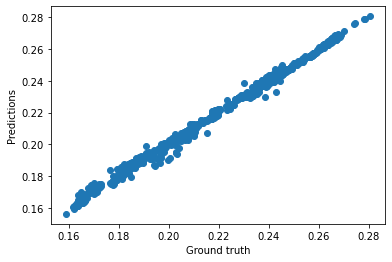

In [28]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [29]:
#%store model_fl_relative_support_x_continuous

In [30]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [31]:
# Save model
#joblib.dump(model_fl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_x_continuous.sav")

### Predict FL foot -> y

In [42]:
# Input
X = np.hstack((X_relative_footsteps_continuous_FL_support[:, :3], # motion command
               X_relative_footsteps_continuous_FL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_FL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_FL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_FL_support[:, 18:20])) # RR (x,y) position 

# Target
Y = np.array([Y_relative_footsteps_continuous_FL_support[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_relative_support_y = LinearRegression()

# Fit the model
model_fl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9967733921845261
RMSE:  0.001979936902171819
The lowest error is:  9.59797669286555e-07
The highest error is:  0.014857510474530794
The avg. error is:  0.0013429107193454037


In [43]:
model_fl_relative_support_y.coef_

array([[ 0.03785324, -0.19199364, -0.07886687, -0.23944398,  1.29608797,
        -0.04527965, -0.28828396, -0.02606887, -0.09368942, -0.20213011,
        -0.086528  ]])

In [44]:
model_fl_relative_support_y.intercept_

array([-0.08755975])

Text(0, 0.5, 'Predictions')

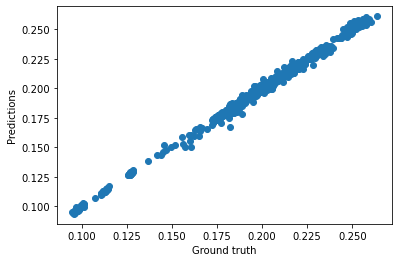

In [45]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [24]:
#%store model_fl_relative_support_y

In [25]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [31]:
# Save model
#joblib.dump(model_fl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_y.sav")